In [1]:
import numpy as np
from keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import  to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

/Users/nisargpatel/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
seed=7
np.random.seed(seed)

In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1).astype('float32')
X_test = X_test.reshape(X_test.shape[0],  28, 28,1).astype('float32')

In [6]:
X_train =X_train/255
X_test =X_test/255

In [7]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
num_classes

10

In [8]:
model=Sequential()
model.add(Conv2D(32, (5, 5), input_shape=(28, 28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 5, 5, 16)          0         
                                                                 
 flatten (Flatten)           (None, 400)               0

In [10]:
datagen = ImageDataGenerator(
    rotation_range=10,  # Rotation angle in degrees
    width_shift_range=0.1,  # Shift fraction of total width
    height_shift_range=0.1,  # Shift fraction of total height
    shear_range=0.1,  # Shear intensity
    zoom_range=0.1,  # Range for random zoom
    horizontal_flip=True  # Randomly flip inputs horizontally
)

datagen.fit(X_train)


In [11]:

model.fit_generator(
    datagen.flow(X_train, y_train, batch_size=32),
    steps_per_epoch=len(X_train) / 32,  
    epochs=50, 
    validation_data=(X_test, y_test)  
)

Epoch 1/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5089 - accuracy: 0.8312 - val_loss: 0.1140 - val_accuracy: 0.9638
Epoch 2/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2010 - accuracy: 0.9372 - val_loss: 0.0754 - val_accuracy: 0.9735
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1552 - accuracy: 0.9520 - val_loss: 0.0589 - val_accuracy: 0.9807
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1330 - accuracy: 0.9586 - val_loss: 0.0579 - val_accuracy: 0.9814
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1225 - accuracy: 0.9614 - val_loss: 0.0548 - val_accuracy: 0.9828
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1133 - accuracy: 0.9636 - val_loss: 0.0510 - val_accuracy: 0.9826
Epoch 7/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1086 - accuracy: 0.9653 - val_loss: 0.0482 - val_accuracy:

In [12]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Epoch 1/10
300/300 [==============================] - 5s 17ms/step - loss: 0.0271 - accuracy: 0.9912 - val_loss: 0.0178 - val_accuracy: 0.9945
Epoch 2/10
300/300 [==============================] - 5s 17ms/step - loss: 0.0199 - accuracy: 0.9937 - val_loss: 0.0164 - val_accuracy: 0.9950
Epoch 3/10
300/300 [==============================] - 5s 17ms/step - loss: 0.0167 - accuracy: 0.9947 - val_loss: 0.0162 - val_accuracy: 0.9949
Epoch 4/10
300/300 [==============================] - 5s 17ms/step - loss: 0.0156 - accuracy: 0.9952 - val_loss: 0.0141 - val_accuracy: 0.9953
Epoch 5/10
300/300 [==============================] - 5s 17ms/step - loss: 0.0139 - accuracy: 0.9952 - val_loss: 0.0160 - val_accuracy: 0.9947
Epoch 6/10
300/300 [==============================] - 5s 18ms/step - loss: 0.0129 - accuracy: 0.9959 - val_loss: 0.0153 - val_accuracy: 0.9952
Epoch 7/10
300/300 [==============================] - 6s 19ms/step - loss: 0.0124 - accuracy: 0.9962 - val_loss: 0.0140 - val_accuracy: 0.9954

In [13]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


Test loss: 0.016680844128131866
Test accuracy: 0.994700014591217


Prediction of model: [1.2257073e-11 4.0422274e-10 1.0000000e+00 1.3150504e-10 2.4907075e-12
 3.3257344e-08 1.7489423e-08 3.8383693e-10 5.0462423e-13 1.8176253e-14]
Actual class:[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


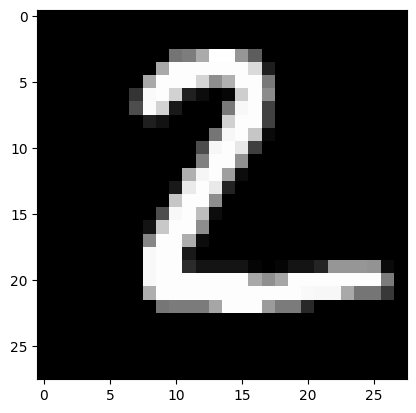

In [14]:
image = (X_test[1]).reshape(1,28,28,1) 
model_pred = model.predict(image, verbose = 0)
print('Prediction of model: {}'.format(model_pred[0]))
print('Actual class:{}'.format(y_test[1]))
plt.imshow(image.reshape(28,28,1),cmap='gray')

Test images shape: (4, 28, 28, 1)
Predicted digit: [1.2257073e-11 4.0422274e-10 1.0000000e+00 1.3150504e-10 2.4907075e-12
 3.3257344e-08 1.7489423e-08 3.8383693e-10 5.0462423e-13 1.8176253e-14]
Predicted digit: [3.2072212e-08 9.9999976e-01 5.1850879e-10 5.1980311e-13 2.0696309e-09
 8.6181916e-11 2.8996372e-09 2.0014359e-07 3.1735303e-10 8.6705233e-11]
Predicted digit: [9.9999964e-01 3.6916947e-18 2.8071950e-12 4.9818689e-13 8.4137869e-10
 1.6969890e-12 3.0353613e-07 5.8340363e-16 1.9422577e-10 1.9089134e-10]
Predicted digit: [1.9730035e-13 2.4651516e-13 6.6920742e-13 1.3161068e-10 9.9955958e-01
 6.2961019e-13 6.8176731e-10 1.2966600e-09 1.2590859e-09 4.4043997e-04]


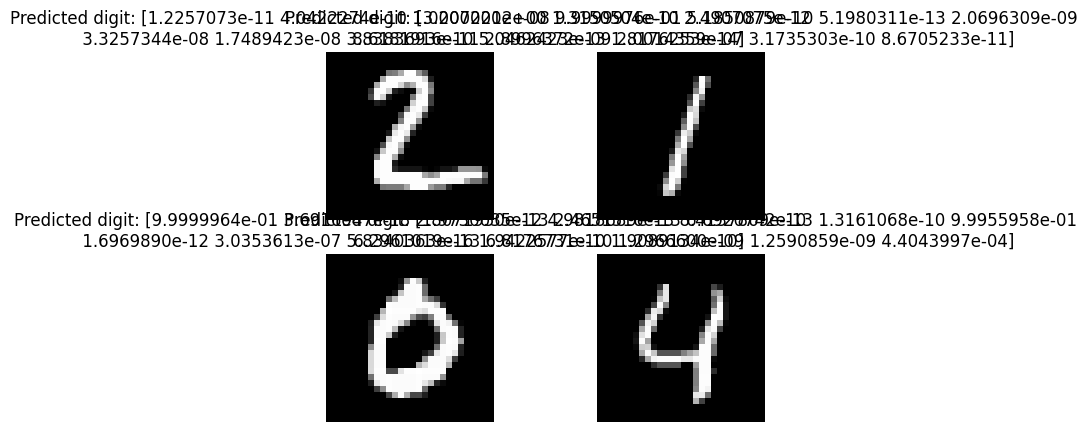

In [15]:
test_images = X_test[1:5]
test_images = test_images.reshape(test_images.shape[0], 28, 28,1)
print ("Test images shape: {}".format(test_images.shape))

for i, test_image in enumerate(test_images, start=1):
    org_image = test_image
    test_image = test_image.reshape(1,28,28,1)
    prediction = model.predict(test_image, verbose=0)

    print ("Predicted digit: {}".format(prediction[0]))
    plt.subplot(220+i)
    plt.axis('off')
    plt.title("Predicted digit: {}".format(prediction[0]))
    plt.imshow(org_image, cmap=plt.get_cmap('gray'))


In [16]:
model_json = model.to_json()


In [17]:
with open("model.json", "w") as json_file:
    json_file.write(model_json)



In [18]:
model.save_weights("models.h5")
print("Saved model to disk")

Saved model to disk
